In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')

# Baixar e ler o Dataset

In [2]:
!gdown 'https://drive.google.com/uc?id=1e1nrIDl-_9YwQNZwbCpWlqylotFlTpya'

Downloading...
From: https://drive.google.com/uc?id=1e1nrIDl-_9YwQNZwbCpWlqylotFlTpya
To: /content/teste_indicium_precificacao.csv
100% 7.08M/7.08M [00:00<00:00, 50.4MB/s]


In [3]:
df = pd.read_csv('teste_indicium_precificacao.csv')

# Análise Exploratória de Dados

In [4]:
display(df)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
df.dtypes

,0
id,int64
nome,object
host_id,int64
host_name,object
bairro_group,object
bairro,object
latitude,float64
longitude,float64
room_type,object
price,int64


As datas estão no formato texto, então vamos transformar para datetime para podermos analisar melhor.

In [6]:
df["ultima_review"] = pd.to_datetime(df["ultima_review"])

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,2018-10-04 01:46:50.710055936,1.373251,7.144005,112.776169
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,NaN,1.680453,32.952855,131.618692


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             48894 non-null  int64         
 1   nome                           48878 non-null  object        
 2   host_id                        48894 non-null  int64         
 3   host_name                      48873 non-null  object        
 4   bairro_group                   48894 non-null  object        
 5   bairro                         48894 non-null  object        
 6   latitude                       48894 non-null  float64       
 7   longitude                      48894 non-null  float64       
 8   room_type                      48894 non-null  object        
 9   price                          48894 non-null  int64         
 10  minimo_noites                  48894 non-null  int64         
 11  numero_de_revie

In [9]:
df.isna().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


## Tratar valores nulos
Os campos `nome`, `host_name`, `ultima_review` e `reviews_por_mes` possuem valores nulos.

- Não podemos remover a coluna `nome`, pois será relevante ao analizar padrões no texto, então iremos preencher os valores nulos com strings vazias.

- Podemos remover `host_name` porque não agrega na análise.

- A coluna `ultima_review` pode ser removida, pois não faremos uma análise temporal.


In [10]:
df.drop(columns=['host_name', 'ultima_review'], axis=1, inplace=True)
df['nome'] = df['nome'].fillna('')

Provavelmente os valores nulos de `reviews_por_mes` indicam que não houveram reviews e não foram preenchidos com 0. Primeiramente, vamos verificar se este é mesmo o caso.

In [11]:
df.query('reviews_por_mes.isna()')['numero_de_reviews'].sum()

0

Como todos os valores de `número_de_reviews` são 0 onde `reviews_por_mes` possui valores nulos, podemos substituir por 0 com segurança.

In [12]:
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0).astype(float)

In [13]:
df.isna().sum()

,0
id,0
nome,0
host_id,0
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0
minimo_noites,0


## Checagem de duplicatas

In [14]:
df.loc[df.duplicated(subset=['latitude', 'longitude'])]

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
11313,8783567,Studio Apt on The Upper West Side,46039971,Manhattan,Upper West Side,40.77874,-73.98437,Entire home/apt,190,5,15,0.35,1,0
12312,9513278,Sunny and chic SoHo apartment,49293535,Manhattan,SoHo,40.72741,-74.00178,Entire home/apt,185,3,2,0.05,1,0
17471,13757434,"PRIVATE LARGE STUDIO FOR YOU, PLUS!",46644337,Brooklyn,Bedford-Stuyvesant,40.68398,-73.94101,Entire home/apt,90,2,113,3.08,3,262
20093,16087406,2 BDRM Presidential Reserve at Wyndham Midtown 45,69545883,Manhattan,Midtown,40.75368,-73.97358,Private room,1599,3,2,0.08,12,365
21705,17447168,"Private Sunny Room in Williamsburg, Brooklyn - NY",30054890,Brooklyn,Williamsburg,40.70818,-73.94952,Private room,56,2,4,0.14,2,0
23323,18879379,Time Square private studio,3291930,Manhattan,Hell's Kitchen,40.75888,-73.99077,Entire home/apt,155,1,0,0.00,1,0
28875,22267769,Cosy room in a cool Williamsburg Apt,72593389,Brooklyn,Williamsburg,40.71353,-73.96216,Private room,60,2,1,0.05,1,0
28990,22316496,Cozy private room in the heart of Nolita / Soho,8726000,Manhattan,Nolita,40.72347,-73.99302,Private room,70,2,2,0.11,1,0
29882,23002312,Park Ave Apt in the Heart of NYC,42677381,Manhattan,Murray Hill,40.74882,-73.97788,Entire home/apt,250,3,9,0.57,1,0
31739,24751420,Cozy and Spacious Studio in Columbus Circle,130965770,Manhattan,Hell's Kitchen,40.76914,-73.98757,Entire home/apt,180,1,43,4.37,1,2


Exemplo de um anúncio com a mesma localidade.

In [15]:
df.query('latitude == 40.77874')

,id,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
3614,2163602,Upper West Side elegance. Riverside,11039974,Manhattan,Upper West Side,40.77874,-73.98437,Entire home/apt,599,1,5,0.14,2,0
11313,8783567,Studio Apt on The Upper West Side,46039971,Manhattan,Upper West Side,40.77874,-73.98437,Entire home/apt,190,5,15,0.35,1,0


Podemos notar que, por mais que são localizados no mesmo lugar/prédio e possuem dados semelhantes, os preços são bem distintos.

O que os difere é o número mínimo de noites e o número de reviews. Possivelmente há outras diferenças em que o dataset não disponibiliza e que impactam no preço final.

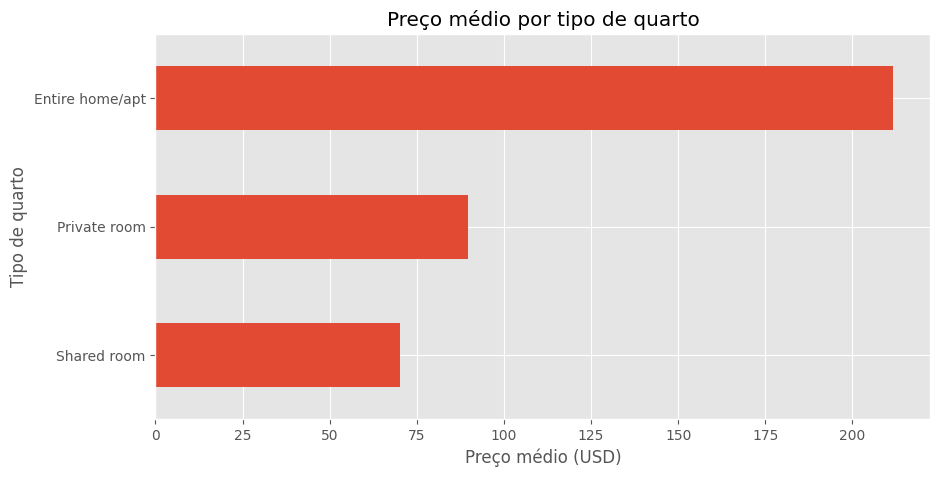

In [49]:
ax = df.groupby('room_type')['price'] \
    .agg(['mean','count']) \
    .query('count >= 5') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(10, 5), title='Preço médio por tipo de quarto')
ax.set_xlabel('Preço médio (USD)')
ax.set_ylabel('Tipo de quarto')
plt.show()

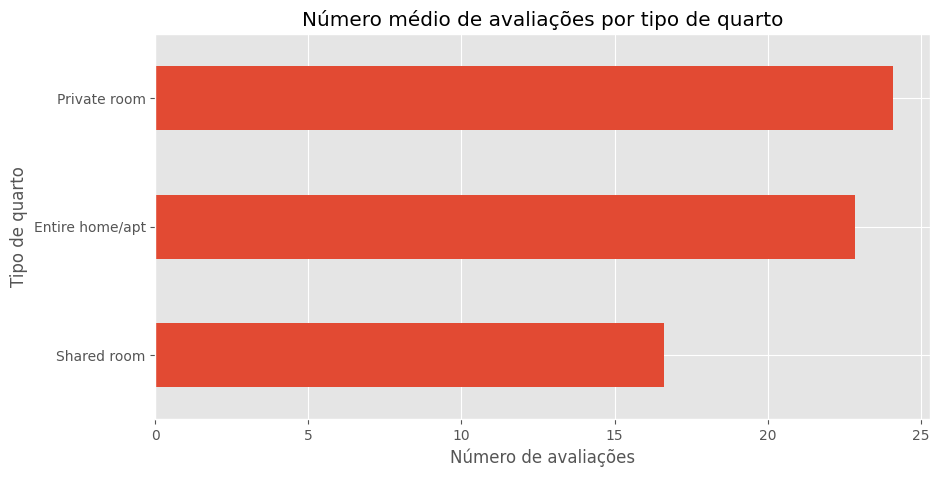

In [50]:
ax = df.groupby('room_type')['numero_de_reviews'] \
    .agg(['mean','count']) \
    .query('count >= 5') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(10, 5), title='Número médio de avaliações por tipo de quarto')
ax.set_xlabel('Número de avaliações')
ax.set_ylabel('Tipo de quarto')
plt.show()

## Localidade

In [16]:
print(f'Quantidade total de bairros: {df["bairro"].nunique()}')
print(f'Quantidade total de grupos de bairros: {df["bairro_group"].nunique()}')

Quantidade total de bairros: 221
Quantidade total de grupos de bairros: 5


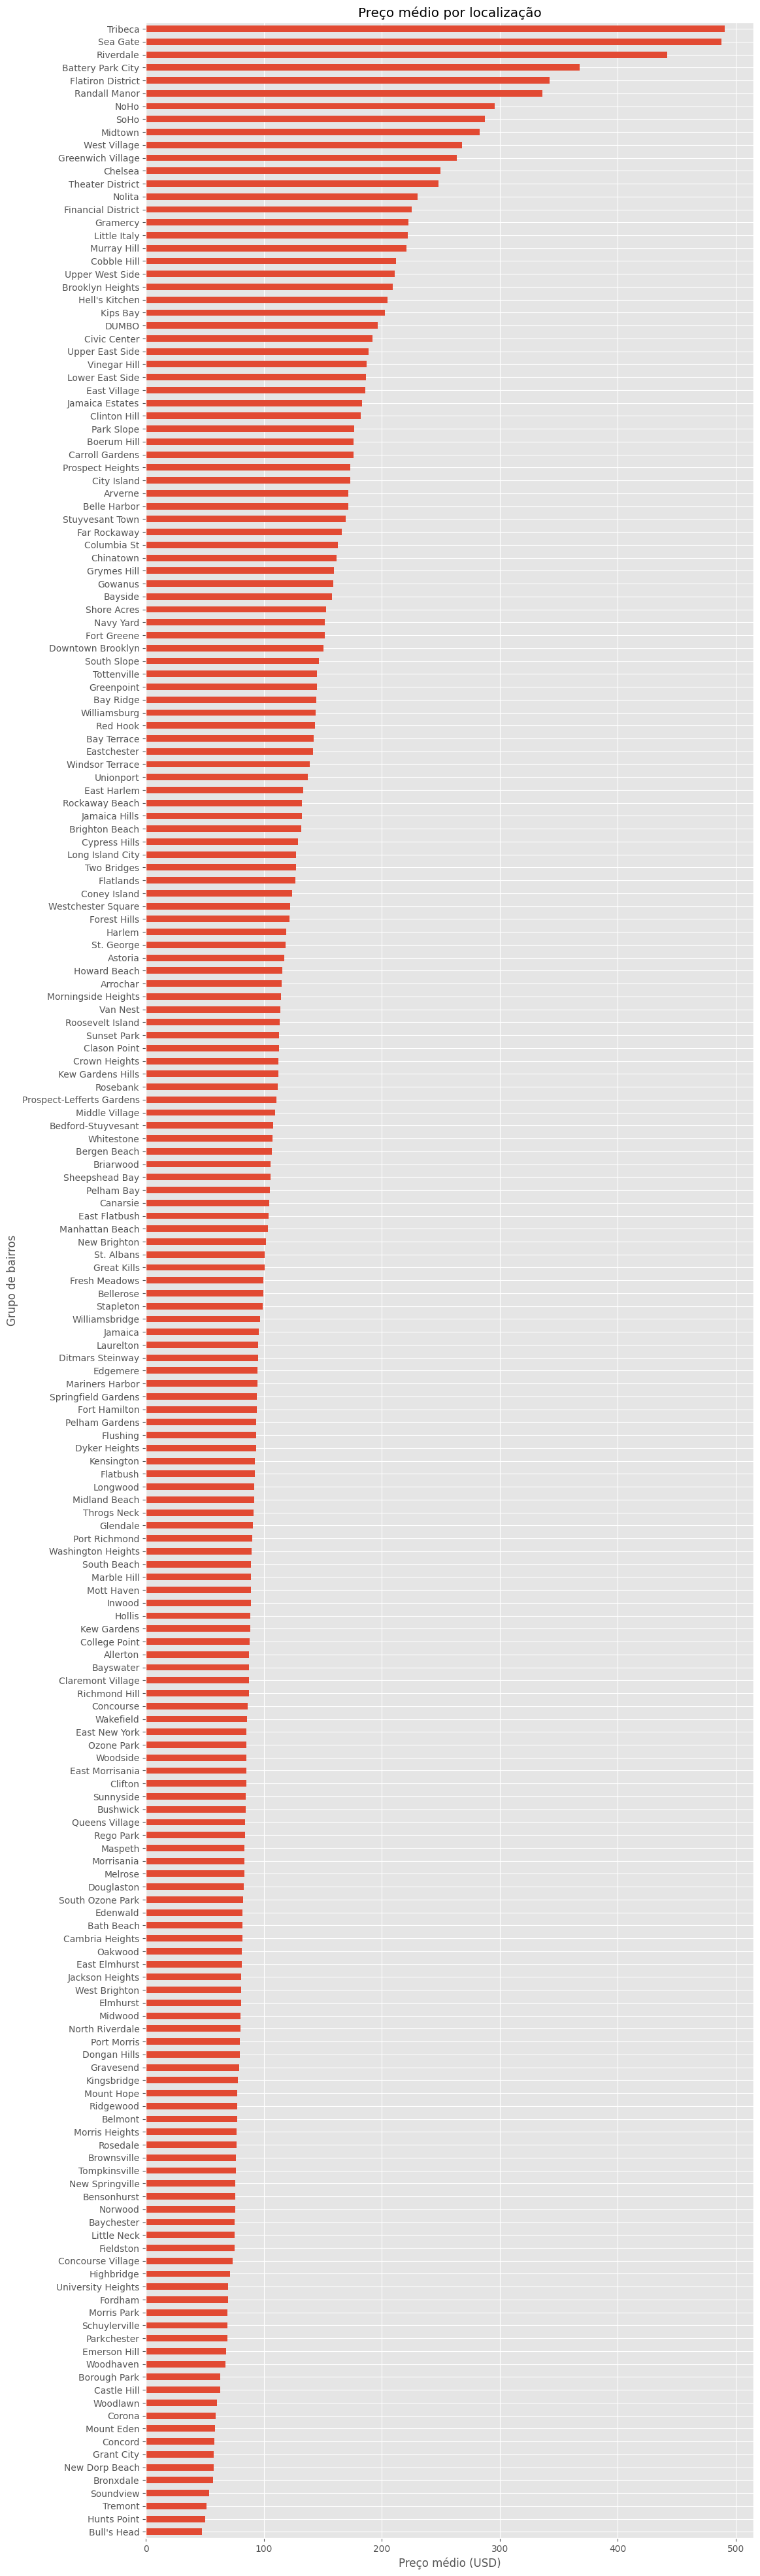

In [17]:
ax = df.groupby('bairro')['price'] \
    .agg(['mean','count']) \
    .query('count >= 5') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 50), title='Preço médio por localização')
ax.set_xlabel('Preço médio (USD)')
ax.set_ylabel('Grupo de bairros')
plt.show()

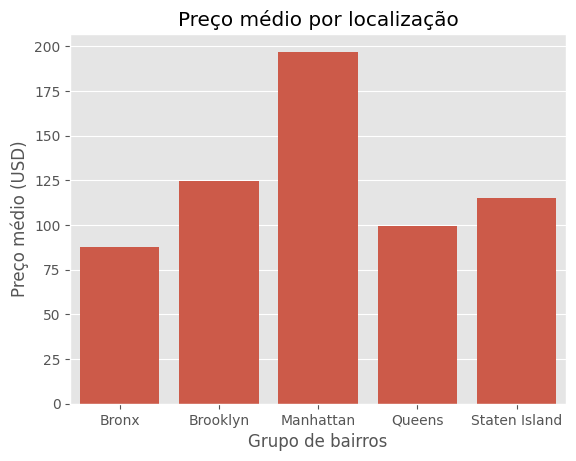

In [18]:
sns.barplot(df.groupby('bairro_group')['price'].mean())
plt.xlabel('Grupo de bairros')
plt.ylabel('Preço médio (USD)')
plt.title('Preço médio por localização')
plt.show()

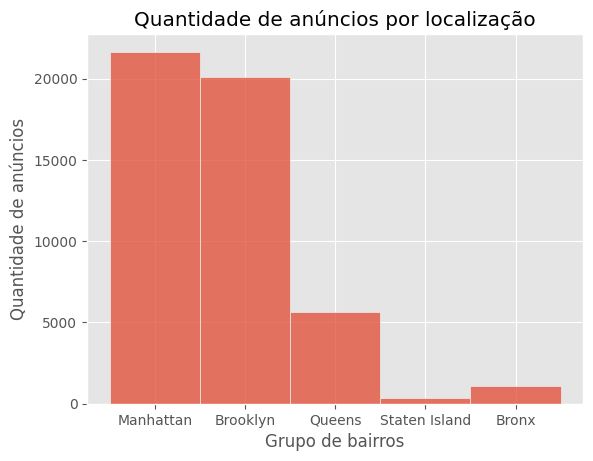

In [19]:
sns.histplot(df['bairro_group'])
plt.xlabel('Grupo de bairros')
plt.ylabel('Quantidade de anúncios')
plt.title('Quantidade de anúncios por localização')
plt.show()

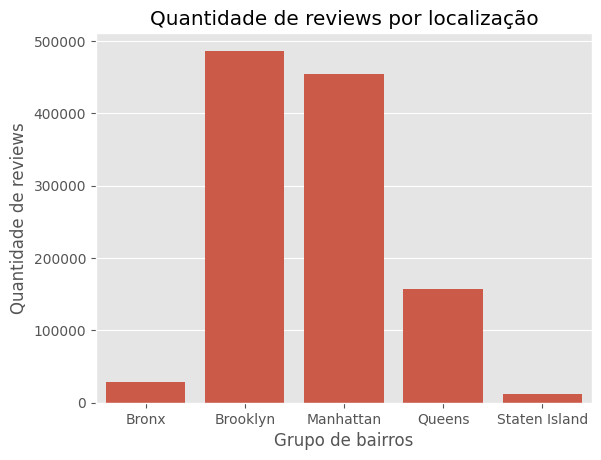

In [20]:
sns.barplot(df.groupby('bairro_group')['numero_de_reviews'].sum())
plt.xlabel('Grupo de bairros')
plt.ylabel('Quantidade de reviews')
plt.title('Quantidade de reviews por localização')
plt.show()

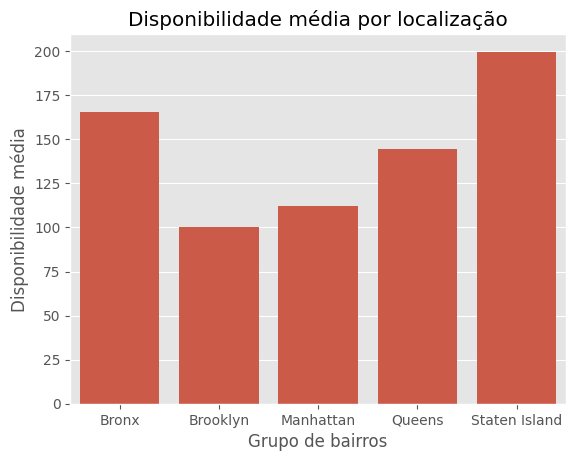

In [21]:
sns.barplot(df.groupby('bairro_group')['disponibilidade_365'].mean())
plt.xlabel('Grupo de bairros')
plt.ylabel('Disponibilidade média')
plt.title('Disponibilidade média por localização')
plt.show()

Os anúncios localizados em Manhattan são os mais caros e possuem a maior concentração, mas mesmo assim essa localidade possui a segunda maior quantidade de reviews. Além disso, a disponibilidade média em Manhattan é baixa em relação à outras localizações, demonstrando que são reservados mais frequentemente.

Desse modo, podemos concluir que se uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, o local mais indicado seria Manhattan.

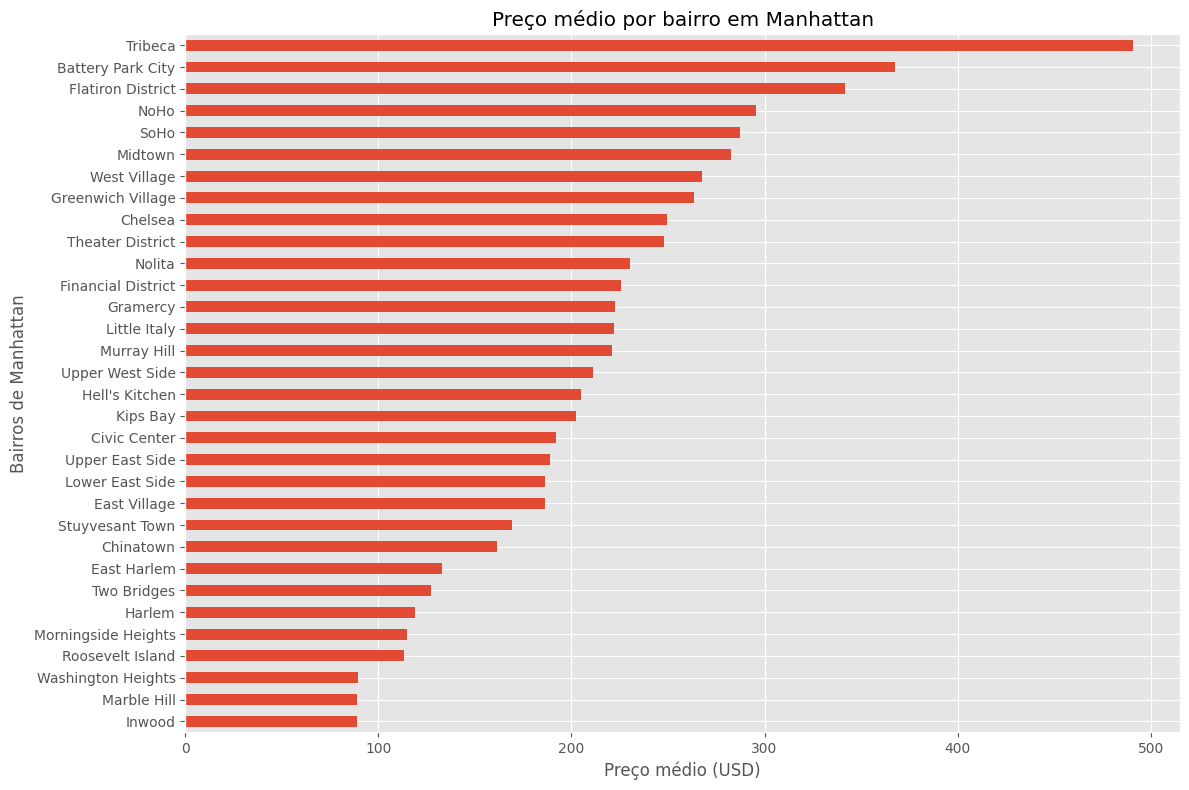

In [22]:
manhattan_df = df[df['bairro_group'] == 'Manhattan']

ax = manhattan_df.groupby('bairro')['price'] \
    .agg(['mean','count']) \
    .query('count >= 5') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 8), title='Preço médio por bairro em Manhattan')

ax.set_xlabel('Preço médio (USD)')
ax.set_ylabel('Bairros de Manhattan')
plt.tight_layout()
plt.show()

In [23]:
manhattan_df.query('bairro == "Tribeca"').describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,1.770000e+02,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.969456e+07,5.274450e+07,40.717744,-74.007400,490.638418,11.378531,11.491525,0.518870,42.971751,126.508475
std,1.114875e+07,5.918894e+07,0.002703,0.002395,856.341720,17.432278,37.763486,1.162779,86.906979,136.813788
min,2.216180e+05,2.406900e+04,40.711800,-74.012530,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.836020e+06,6.255854e+06,40.715520,-74.009420,200.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,2.179847e+07,2.851814e+07,40.717850,-74.006940,295.000000,3.000000,2.000000,0.110000,1.000000,66.000000
75%,3.038792e+07,1.074344e+08,40.719530,-74.005460,485.000000,30.000000,10.000000,0.560000,3.000000,280.000000
max,3.641957e+07,2.718632e+08,40.725200,-74.002600,8500.000000,180.000000,447.000000,10.000000,232.000000,365.000000


O bairro Tribeca seria uma localização mais específica para quem busca investir em Manhattan.

# Disponibilidade e Número mínimo de noites

In [24]:
df[['price', 'minimo_noites', 'disponibilidade_365']].describe()

,price,minimo_noites,disponibilidade_365
count,48894.000000,48894.000000,48894.000000
mean,152.720763,7.030085,112.776169
std,240.156625,20.510741,131.618692
min,0.000000,1.000000,0.000000
25%,69.000000,1.000000,0.000000
50%,106.000000,3.000000,45.000000
75%,175.000000,5.000000,227.000000
max,10000.000000,1250.000000,365.000000


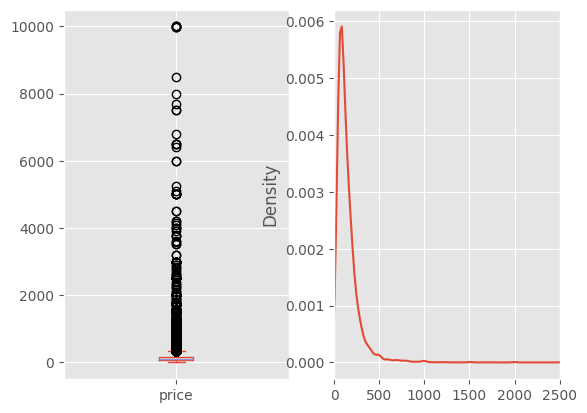

In [25]:
plt.subplot(1, 2, 1)
df['price'].plot(kind='box')

plt.subplot(1, 2, 2)
df['price'].plot(kind='kde', xlim=(0, 2500))
plt.show()

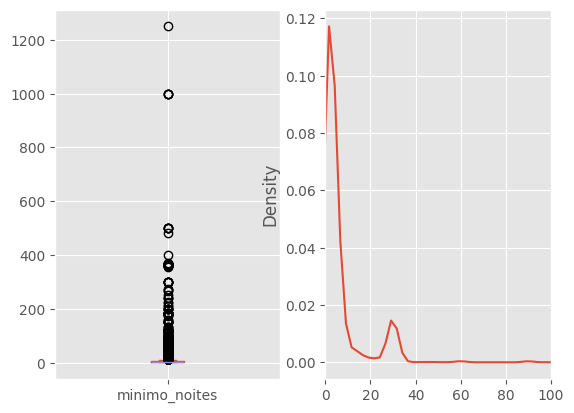

In [26]:
plt.subplot(1, 2, 1)
df['minimo_noites'].plot(kind='box')

plt.subplot(1, 2, 2)
df['minimo_noites'].plot(kind='kde', xlim=(0, 100))
plt.show()

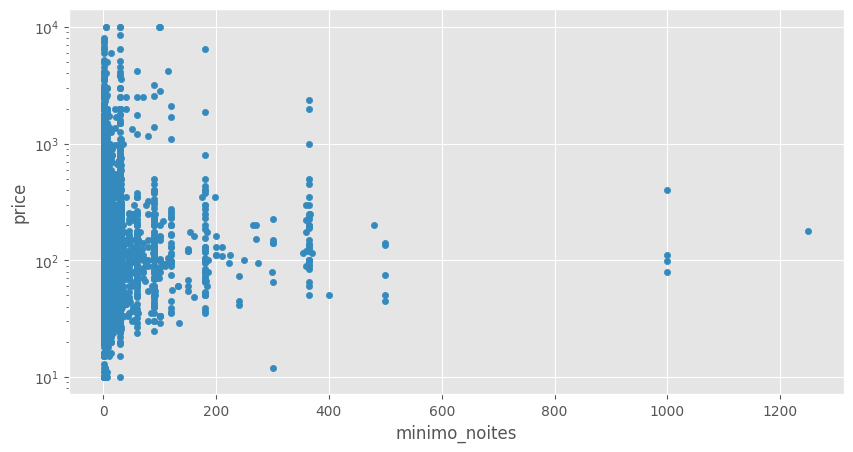

In [27]:
df.plot(kind='scatter',x='minimo_noites', y='price', figsize=(10, 5))
plt.yscale('log')
plt.show()

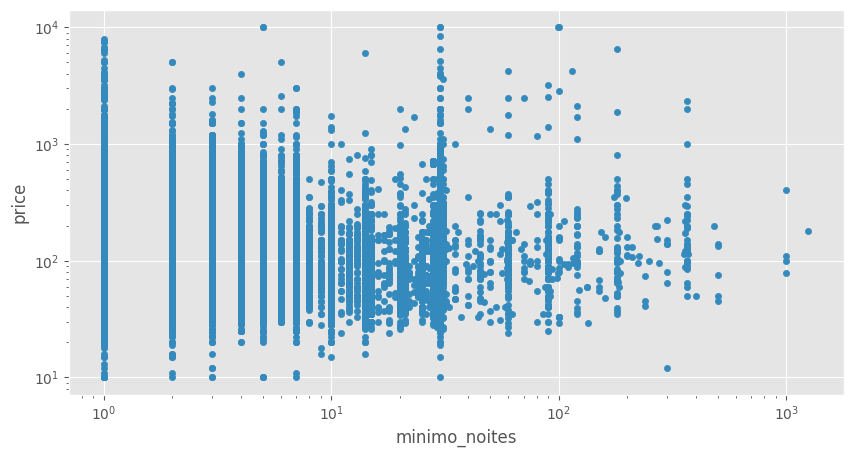

In [28]:
df.plot(kind='scatter',x='minimo_noites', y='price', figsize=(10, 5))
plt.yscale('log')
plt.xscale('log')
plt.show()

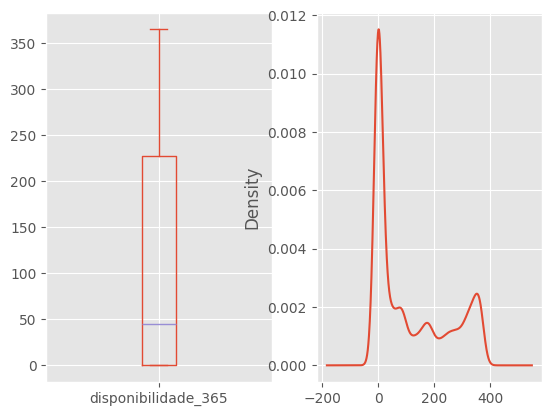

In [29]:
plt.subplot(1, 2, 1)
df['disponibilidade_365'].plot(kind='box')

plt.subplot(1, 2, 2)
df['disponibilidade_365'].plot(kind='kde')
plt.show()

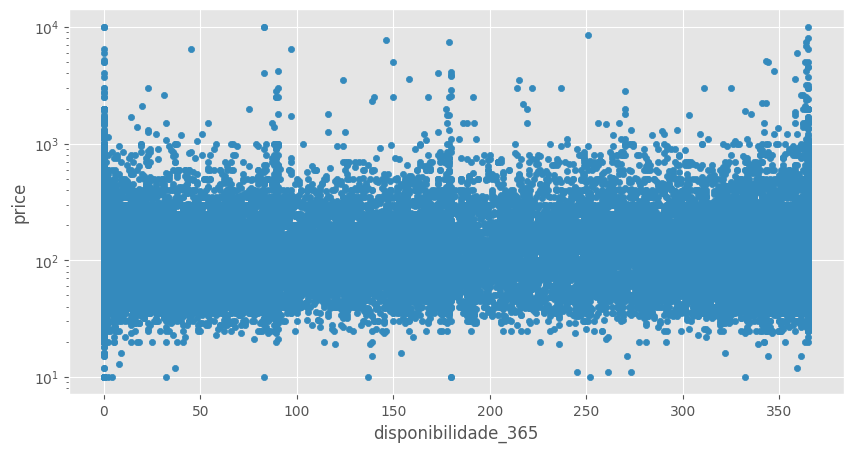

In [30]:
df.plot(kind='scatter',x='disponibilidade_365', y='price', figsize=(10, 5))
plt.yscale('log')
plt.show()

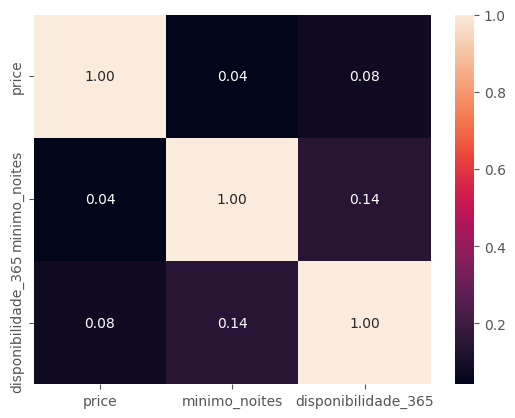

In [31]:
corr = df[['price', 'minimo_noites', 'disponibilidade_365']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Não há uma correlação direta entre o mínimo de noites e disponibilidade com o preço do anúncio.

## Análise do nome do local

In [32]:
import spacy
!pip install unidecode
from unidecode import unidecode
import re
from wordcloud import WordCloud

In [33]:
nlp = spacy.load('en_core_web_sm')

### Preprocessamento

In [34]:
def preprocess_text(text):
    text = str(text)
    text = text.lower()
    text = unidecode(text)
    text = re.sub('[^A-Za-z]+', ' ', text)

    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

df['nome_preprocessado'] = df['nome'].apply(preprocess_text)
display(df[['nome_preprocessado', 'nome']])

,nome_preprocessado,nome
0,skylit midtown castle,Skylit Midtown Castle
1,village harlem new york,THE VILLAGE OF HARLEM....NEW YORK !
2,cozy entire floor brownstone,Cozy Entire Floor of Brownstone
3,entire apt spacious studio loft central park,Entire Apt: Spacious Studio/Loft by central park
4,large cozy br apartment midtown east,Large Cozy 1 BR Apartment In Midtown East
...,...,...
48889,charming bedroom newly renovated rowhouse,Charming one bedroom - newly renovated rowhouse
48890,affordable room bushwick east williamsburg,Affordable room in Bushwick/East Williamsburg
48891,sunny studio historical neighborhood,Sunny Studio at Historical Neighborhood
48892,rd st time square cozy single bed,43rd St. Time Square-cozy single bed


### Nuvem de Palavras

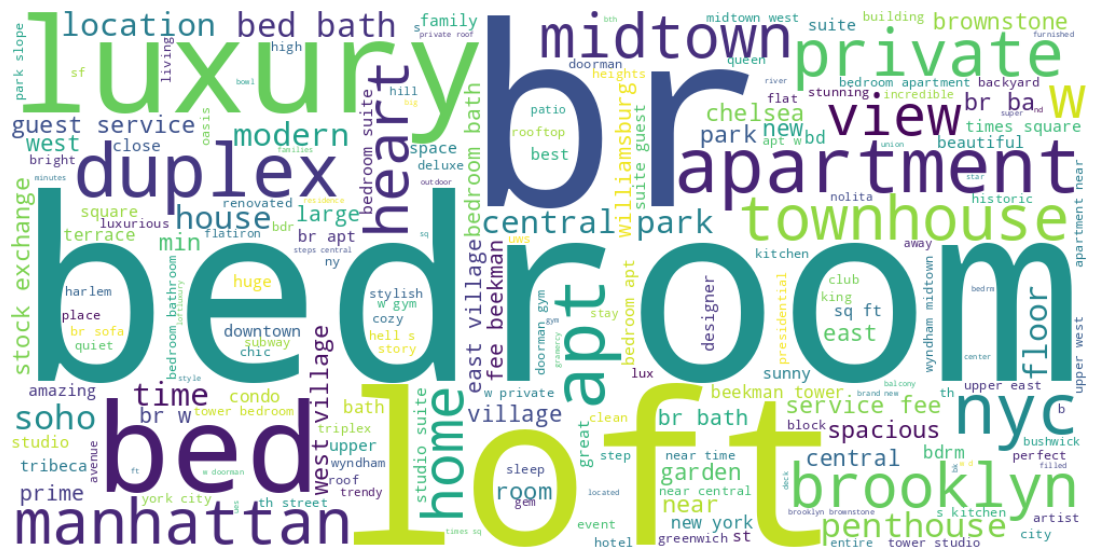

In [35]:
top_prices = df.nlargest(int(len(df) * 0.05), 'price') # Top 5%
text = ''.join(str(name) for name in top_prices['nome_preprocessado'])

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
top_10_words=list(wordcloud.words_.keys())[:10]
print('Top 10 palavras mais comuns nos anúncios mais caros:')
print(top_10_words)

Top 10 palavras mais comuns nos anúncios mais caros:
['bedroom', 'br', 'loft', 'luxury', 'bed', 'apartment', 'duplex', 'apt', 'nyc', 'private']


Agora vamos analisar o preço médio dos anúncios que contém essas palavras.

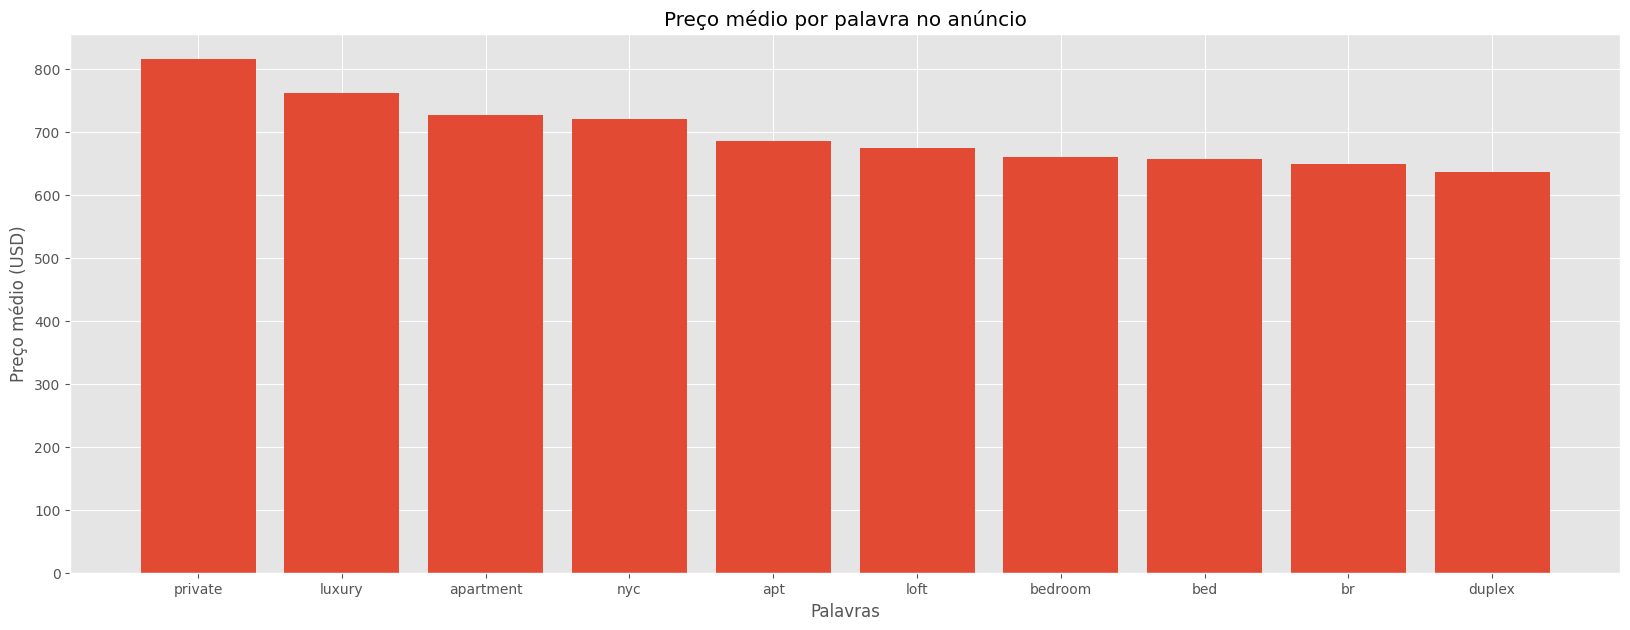

In [37]:
mean_price = df['price'].mean()
results = []
for word in top_10_words:
    df_palavra = top_prices[top_prices['nome_preprocessado'].str.contains(word, case=False, na=False)]
    mean_word_price = df_palavra['price'].mean()
    word_count = len(df_palavra)
    if mean_word_price > mean_price and word_count > 10:
        results.append((word, df_palavra["price"].mean()))

top_10_words_prices = sorted(results, key=lambda x: x[1], reverse=True)[:10]

words, prices = zip(*top_10_words_prices)
plt.figure(figsize=(20, 7))
plt.bar(words, prices)
plt.xlabel('Palavras')
plt.ylabel('Preço médio (USD)')
plt.title('Preço médio por palavra no anúncio')
plt.show()


# Previsão do Preço

In [38]:
df.dtypes

,0
id,int64
nome,object
host_id,int64
bairro_group,object
bairro,object
latitude,float64
longitude,float64
room_type,object
price,int64
minimo_noites,int64


In [39]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.090928,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.597294,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

Vamos selecionar algumas features para classificação. Vamos remover informações como latitude e longitude, pois os dados de localização já estão sendo informados pelos bairros e grupos de bairros, de forma categórica.

In [52]:
df_filtered = df[(df['price'] > 0)] # Evita divisão por zero ao utilizar a escala logarítimica

X = df_filtered[['bairro_group', 'bairro', 'room_type', 'minimo_noites', 'numero_de_reviews',
                  'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']].copy()

y= np.log10(df_filtered['price'])

É necessário fazer um enconding para as variáveis categóricas.

In [53]:
label_encoders = {}
for categorical_col in ['bairro_group', 'bairro', 'room_type']:
    label_encoders[categorical_col] = LabelEncoder()
    X[categorical_col] = label_encoders[categorical_col].fit_transform(X[categorical_col])

## Métricas:

**MSE:** Sensível a desvios grandes.

**MAE:** Mais sensível a outliers.

**R²:** Explica a variância dos dados, mais indicado para modelos de regressão.

## Random Forest

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treino do modelo
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred = rf_model.predict(X_test)

# Métricas
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)

# Resultados
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')

MSE: 0.20
MAE: 0.14
R2 Score: 56.17


## Regressão Linear

In [56]:
# Treinamento
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Previsão
y_pred = lin_model.predict(X_test)

# Métricas
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)

# Resultados
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')

MSE: 0.23
MAE: 0.17
R2 Score: 40.93


In [57]:
test = {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

### Testando com um exemplo

In [58]:
def predict_price(x, model, label_encoders):
    x_df = pd.DataFrame([x])
    x_df_filtered = x_df[['bairro_group', 'bairro', 'room_type', 'minimo_noites', 'numero_de_reviews',
                  'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']].copy()

    for categorical_col in ['bairro_group', 'bairro', 'room_type']:
        x_df_filtered[categorical_col] = label_encoders[categorical_col].transform(x_df_filtered[categorical_col])

    pred = model.predict(x_df_filtered)

    return 10**pred[0] # Conversão de log

In [59]:
rf_pred = predict_price(test, rf_model, label_encoders)
lin_pred = predict_price(test, lin_model, label_encoders)

print(f'Random Forest: {rf_pred}')
print(f'Regressão Linear: {lin_pred}')

Random Forest: 248.9870941132222
Regressão Linear: 204.776256204451


O preço mais indicado ao anúncio seria de $248.